# Data 550 Project 1
### Names: Connor Fairbanks, Graham Kerford



### Description of the Data

This dataset contains characteristics of a sample of medical insurance policy holders from the US population, including their yearly medical costs billed by their health insurance. This dataset is available from the site [Kaggle](https://www.kaggle.com/mirichoi0218/insurance/home), where it was stated that this dataset was used in the textbook ["Machine Learning with R" by Brett Lantz](https://www.amazon.com/Machine-Learning-R-Brett-Lantz/dp/1782162143). The textbook explained that the U.S. Census Bureau demographic statistics were used to create this simulated dataset. The details (including date, collection method, etc.) of the associated Census data was collected was not provided. This dataset was created for educational purposes (to allow students to practice manipulating/analyzing a dataset). The dataset contains the following characteristics for each individual:

- `age`: The age of the policy holder (those above 64 years old were excluded as their medical insurance is generally provided by the government).

- `sex`: The sex of the policy holder (`male` or `female`).

- `bmi`: The body mass index of the policy holder. This is a numerical value that is meant to give an idea of a persons weight in relation to their height. BMI is equal to a person's weight (in kilograms) divided by their height (in meters) squared. BMI values are often interpreted based on the following ranges: 
    - underweight: < 18.5 kg/m$^2$ 
    - normal weight: 18.5 kg/m$^2$ - 24.9 kg/m$^2$
    - overweight: 25 kg/m$^2$ - 29.9 kg/m$^2$
    - obese: $\geq$ 30 kg/m$^2$

- `children`: The number of children/dependents covered by the insurance plan.

- `smoker`: A `yes` or `no` answer to the question "Does the policy holder regularly smoke tobacco?"

- `region`: The geographical region of the policy holder's place of residence in the United States. Possible regions include: `northeast`, `southeast`, `southwest`, `northwest`. 

- `charges`: The total medical expenses (in USD) of the policy holder billed by the health insurance company for the given year.  

### Loading the Data

In [1]:
#import necessary libraries
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
# Importing the data
data = pd.read_csv("medical_cost.csv")

## Exploring the dataset and Initial thoughts

Display the first 5 rows of the dataframe to get an idea of what the data looks like. 

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Display the data types and show that there are no 'null' values in our dataset. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Show the summary statistics of the columns containing continuous data.

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can also look at the correlation between the numerical data in the dataframe. We don't see any strong correlations between variables, but it is noteworthy that the two highest correlation values are between `age ` and `charges`, and between `bmi` and `charges`. This relationship will be explored in further detail later in this document. 

In [6]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Display the counts of data that fall into the different categorical data groups.
First we will look at the different regions.

In [7]:
region_count_df = data.groupby('region').count().reset_index()
region_count_df

,region,age,sex,bmi,children,smoker,charges
0,northeast,324,324,324,324,324,324
1,northwest,325,325,325,325,325,325
2,southeast,364,364,364,364,364,364
3,southwest,325,325,325,325,325,325


Next, we will see the number of smokers compared to non-smokers in the data.

In [8]:
smoker_count_df = data.groupby('smoker').count().reset_index()
smoker_count_df

,smoker,age,sex,bmi,children,region,charges
0,no,1064,1064,1064,1064,1064,1064
1,yes,274,274,274,274,274,274


Lastly, we will check to see the number of males and females surveyed. 

In [9]:
sex_count_df = data.groupby('sex').count()
sex_count_df

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


The following visualization summarizes the counts of the categorical data. We can see that the number of people from different regions and sexes were sampled relatively evenly. The number of smokers sampled is much smaller than the number of non-smokers sampled.  

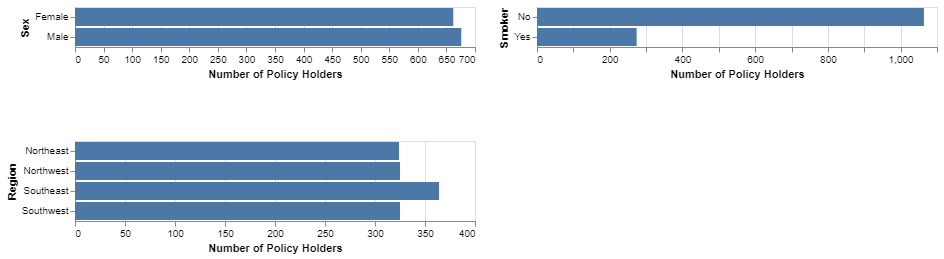

In [10]:

data_cap = data.copy()
# Rename columns to have capital letter. 
data_cap.rename(columns= {'sex': 'Sex', 'smoker':'Smoker', 'region':'Region', 'age': 'Age', 'children':'Children', 'bmi':'BMI', 'charges':'Charges'}, inplace=True)
# Capitalize string data.
data_cap['Sex'] = data_cap['Sex'].map(lambda x: x.capitalize())
data_cap['Smoker'] = data_cap['Smoker'].map(lambda x: x.capitalize()) 
data_cap['Region'] = data_cap['Region'].map(lambda x: x.capitalize())
# Create bar charts of counts of categorical data.
alt.Chart(data_cap).mark_bar().encode(
    alt.X('count()', title='Number of Policy Holders'), alt.Y(alt.repeat(), type='nominal')).repeat(['Sex', 'Smoker', 'Region'], columns=2)


The primary variable of interest here is the `charges` of the individuals based on their other characteristics. One way to see the relationship between the categorical data and the `charges` is the look at the summary statistics for `charges` for each group of the categories.

It is clear that the average `charges` of smokers is much higher than non-smokers. 

In [11]:

data_cap.groupby(['Smoker']).agg({'Charges': ['mean', 'median', 'min', 'max']})

Charges                                      
                mean       median         min          max
Smoker                                                    
No       8434.268298   7345.40530   1121.8739  36910.60803
Yes     32050.231832  34456.34845  12829.4551  63770.42801

The average `charges` are not very different for the females and males. 

In [12]:
data_cap.groupby(['Sex']).agg({'Charges': ['mean', 'median', 'min', 'max']})

Charges                                    
                mean      median        min          max
Sex                                                     
Female  12569.578844  9412.96250  1607.5101  63770.42801
Male    13956.751178  9369.61575  1121.8739  62592.87309

The average charges does seem to be slightly higher for the `Southeast` region compared to the other regions. 

In [13]:
data_cap.groupby(['Region']).agg({'Charges': ['mean', 'median', 'min', 'max']})

Charges                                      
                   mean        median        min          max
Region                                                       
Northeast  13406.384516  10057.652025  1694.7964  58571.07448
Northwest  12417.575374   8965.795750  1621.3402  60021.39897
Southeast  14735.411438   9294.131950  1121.8739  63770.42801
Southwest  12346.937377   8798.593000  1241.5650  52590.82939

## Research Question #1 (answered in this project):

Charges billed by health insurance companies are a reflection of the health and wellbeing of specific demographics of the population.

Does a person's age, smoking status, and BMI, which are known to affect a person's health, influence the charges billed by health insurance companies?

Furthermore, are there are any differences in charges in each region when viewing the data sorted by region and sex?
- This will help to determine if there are variations in policy in each region when it comes to how they treat the different sexes. 





## Data Wrangling and Data Visualizations for Research Question #1:

In [14]:
data_ns = data[data['smoker'] == 'no']
col_names_list = ['age','bmi','children','charges']

<ipython-input-15-7988c72b6491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ns['sex'] = data_ns['sex'].map(lambda x: x.capitalize())
<ipython-input-15-7988c72b6491>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ns['smoker'] = data_ns['smoker'].map(lambda x: x.capitalize())
<ipython-input-15-7988c72b6491>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

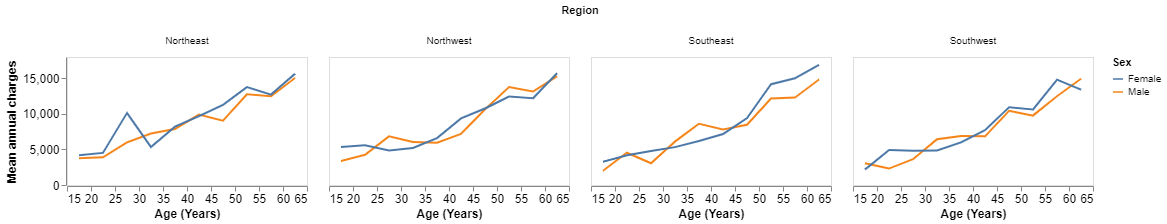

In [15]:
# Capitalize string data so labels will be capitalized
data_ns['sex'] = data_ns['sex'].map(lambda x: x.capitalize())
data_ns['smoker'] = data_ns['smoker'].map(lambda x: x.capitalize()) 
data_ns['region'] = data_ns['region'].map(lambda x: x.capitalize())


(alt.Chart(data_ns).mark_line().encode(
   x = alt.X('age', bin=alt.Bin(maxbins=20), axis=alt.Axis(title='Age (Years)', grid=False)),
   y = alt.Y('mean(charges)', axis=alt.Axis(title='Mean annual charges', grid=False)),
   color = alt.Color('sex', title='Sex'),
   column = alt.Column('region', title='Region')
).properties(
    height = 128,
    width = 240
).configure_axis(
    labelFontSize=12,
    titleFontSize=12

))

The plots for the average annual charge filed by insurance companies in each region according to age and sex indicate that there is little variation in healthcare costs between the sexes. Started at the age of 18, the average American is expected have \\$4,000 in medical expenses, which will increase by \\$280 each year. If we extrapolate from this data, we can determine that by the time they die at the age of 79 (the mean life expectancy in the US), it is expected that insurance companies will file on average over \\$21,000 to pay for their healthcare. This adds up to a total of over \\$765,000 per individual in their lifetime.

## Research Question #2 (NOT answered in this project):

Due to the high cost of health care in the US, most Americans rely on health insurance that is provided through their work. Many individuals, particularly in the lower socioeconomic class, either lack significant coverage or have difficulty paying insurance premiums. These individuals may delay or forgo treatment until they are able to afford it.

How often do those in the lower socioeconomic class forgo medical treatment due to lack of health insurance coverage or inability to pay health insurance premiums?
- To investigate this question, we would need to include annual household income, number of dependents, and the number of health claims per year. We could then see how income affects the number of health claims per year. 

## Research Question #3 (NOT answered in this project):
Does smoking tobacco have the same effect on an individual's health regardless of their age?
- To investigate this, we would require the length of time that an individual has smoked for, the amount of cigarettes they smoked each day and the number of medical visits or health issues they have had.

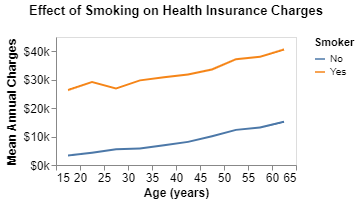

In [16]:
# Capitalize smoker column strings
data['smoker'] = data['smoker'].map(lambda x: x.capitalize())

# Create chart showing average 
(alt.Chart(data, title=alt.TitleParams(text="Effect of Smoking on Health Insurance Charges", dy = -15)).mark_line().encode(
   x = alt.X('age', bin=alt.Bin(maxbins=20), axis=alt.Axis(title='Age (years)', grid=False)),
   y = alt.Y('mean(charges)', axis=alt.Axis(title='Mean Annual Charges', format='$~s', grid=False)),
   color = alt.Color('smoker', title='Smoker')
).properties(
    height = 128,
    width = 240
).configure_axis(
    labelFontSize=12,
    titleFontSize=12

))

As expected, smoking tobacco is associated with an increase healthcare costs. For each age group, smoking increases health claims by roughly \\$23,000 per year.

We were surprised to see that the magnitude of increase in costs of these claims is uniform for all age groups. This suggests that smoking negatively affects the health of individuals regardless of their age. 
 

In [17]:
data_age_corrected = data.copy()

In [18]:
# Correcting for age by subtracting the annual average increase in health costs
# caused by smoking (roughly $22000) from each age group. 
data_age_corrected['charges'] = data_age_corrected['charges']-((data_age_corrected['age']-18)*280)
data_age_corrected.loc[data_age_corrected['smoker'] == 'Yes', 'charges'] = data_age_corrected.loc[data_age_corrected['smoker'] == 'Yes', 'charges'] - 23000

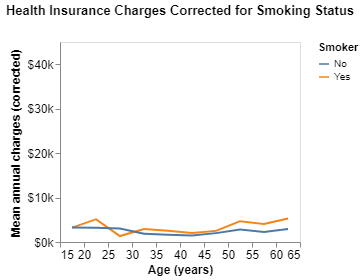

In [19]:
# Create chart showing health insurance charges by age if we correct for smoking status by subtracting $23000 from each individual who smokes. 
(alt.Chart(data_age_corrected, title=alt.TitleParams(text='Health Insurance Charges Corrected for Smoking Status', dy=-20)).mark_line().encode(
   x = alt.X('age', bin=alt.Bin(maxbins=20), axis=alt.Axis(title='Age (years)', grid=False)),
   y = alt.Y('mean(charges)',scale=alt.Scale(domain=(0, 45000)), axis=alt.Axis(title='Mean annual charges (corrected)', grid=False, format='$~s')),
   color = alt.Color('smoker', title='Smoker')
).properties(
    height = 200,
    width = 240
).configure_axis(
    labelFontSize=12,
    titleFontSize=12

))

As we can see in the plot above, if we correct for age and smoking by subtracting the average increase in healthcare cost caused by smoking (about \\$23,000) from each individual who smokes, we can see that according to this data, smoking has the same effect on healthcare costs no matter the age (within 18-64 years old). If the lines were obviously divergent, we would know that smoking is having a larger effect on healthcare costs at certain ages, which is not the case here.  

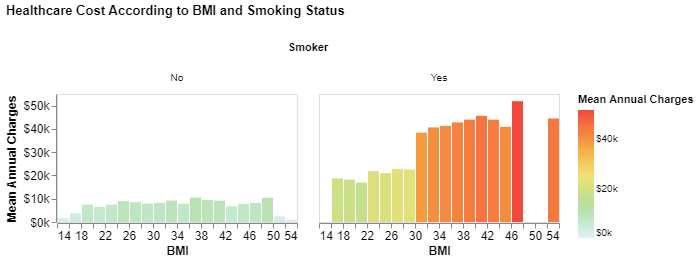

In [20]:
(alt.Chart(data, title=alt.TitleParams(text='Healthcare Cost According to BMI and Smoking Status', dy=-20)).mark_bar().encode(
   x = alt.X('bmi', bin=alt.Bin(maxbins=20), axis=alt.Axis(title='BMI', grid=False)),
   y = alt.Y('mean(charges)', axis=alt.Axis(title='Mean Annual Charges', grid=False, format='$~s')),
   column = alt.Column('smoker', title='Smoker'),
   color=alt.Color('mean(charges)', scale=alt.Scale(scheme='lightmulti',zero = True), legend=alt.Legend(title="Mean Annual Charges", format='$~s'))
).properties(
    height = 128,
    width = 240
).configure_axis(
    labelFontSize=12,
    titleFontSize=12

))

As previously mentioned, medical expenses for smokers are significantly higher than non-smokers. What is interesting is that if you smoke, medical expenses are reflective of the level of your BMI. If you smoke and have a BMI over 30, your annual medical expenses will be on average over \\$30,000 per year, contrary to the \\$18,000 annually if your BMI is less than 30. For non-smokers, medical costs remain below \\$5,000 regardless of the BMI. What is interesting is that BMI effect on medical expenses only applies to smokers, and that there is a sharp distinction between smokers average annual charges based on their BMI (BMI of greater than or less than 30). 

## Research Question #4 (answered in this project):
Why are the average charges in the Southeast region higher than for the other regions? What can we learn from the data that makes the Southeast region unique?

## Data Wrangling and Data Visualization for Question #4:

In [21]:
# Filtering dataframe to have only obese people. 
data_high_bmi = data_cap[data_cap['BMI'] >= 30].reset_index(drop=True)
bmi_reg = data_high_bmi.groupby(['Region']).agg({'BMI': 'count'}).reset_index()
reg_counts = data_cap.groupby('Region')['BMI'].count().reset_index(drop=True)
reg_counts
# Getting ratio of Obese:total people in each region. 
bmi_reg['obese_ratio'] = round(bmi_reg['BMI']/reg_counts, 2)






In [22]:
# Create chart to show proportion of obese people:total people in each region. 
bmi_chart = alt.Chart(bmi_reg, title=alt.TitleParams(text='Percentage of Obese People in Regions', fontSize=15, dy=-20)).mark_bar(opacity=0.8, cornerRadius=3).encode(alt.Y('obese_ratio', axis=alt.Axis(format='%'), title=None), alt.X('Region', title=None, axis=alt.Axis(labelAngle=0)),
    color = alt.condition(alt.datum.Region == 'Southeast', alt.value('orange'), alt.value('steelblue'))).properties(height=350, width=250)


In [23]:
# Filter df to see number of smokers and non-smokers by region
smoke_ratio = data_cap.groupby(['Region', 'Smoker']).count()
new = smoke_ratio[['Age']]
final = new.reset_index()
# Create array of regions
region = final.Region.unique()
# Create arrays of 'yes' smokers and `no' smokers in each region.
smoke_yes = final.loc[final.Smoker == 'Yes', 'Age'].reset_index(drop=True)
smoke_no = final.loc[final.Smoker == 'No', 'Age'].reset_index(drop=True)

# Create new dataframe with a column showing ratio of smokers:total people in each region. 
smoke_reg_df = pd.DataFrame({'Region': region, 'Smoker': smoke_yes, 'Nonsmoker': smoke_no})
smoke_reg_df['Smoker_ratio'] = round(smoke_reg_df.Smoker/(smoke_reg_df.Nonsmoker + smoke_reg_df.Smoker), 2)




In [24]:
# Create chart to show proportion of smokers:total people in each region. 
smoke_chart = alt.Chart(smoke_reg_df, title=alt.TitleParams(text='Percentage of Smokers in Regions', fontSize=16, dy=-20)).mark_bar(opacity=0.8, cornerRadius=3).encode(alt.X('Region', title=None, axis=alt.Axis(labelAngle=0)), alt.Y('Smoker_ratio', axis=alt.Axis(format='%'), title=None),
color = alt.condition(alt.datum.Region == 'Southeast', alt.value('orange'), alt.value('steelblue'))).properties(height=350, width=250)

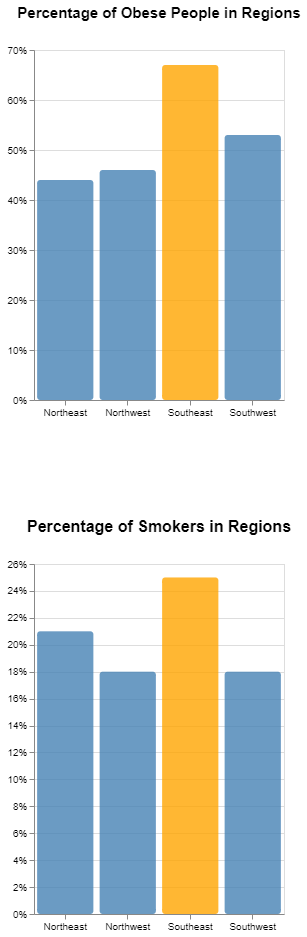

In [25]:
# Display both charts side by side. 
alt.VConcatChart(vconcat=(bmi_chart, smoke_chart), spacing=100)

As we learned earlier, smokers with a BMI over 30 have exceptionally high medical costs compared to the rest of the sampled population. We can see from the charts above that those sampled in the Southeast region have a higher proportion of people that are obese (BMI $\geq$ 30), and a higher proportion of people who smoke tobacco when compared to the other regions.  These unique features of the Southeast region are likely the cause of the increased medical costs seen here. 

## Summary and Conclusions:

Throughout the analysis of this data, it became clear that certain characteristics of individuals have a large effect on the medical charges billed by their health insurance company. Those who smoke have much higher medical costs, and those who smoke and have a high BMI see a drastic increase in costs. Age is also an obvious factor in the healthcare costs of individuals. 

There are other factors that did not seem to influence the medical costs. It was interesting to note that even though some women would incur childbirth expenses, sex did not have any effect on medical costs. It was also surprising to see that the number of children/dependents on a plan was not highly correlated with medical costs. 

Although nothing can be done about aging, health insurance companies would be wise to focus efforts on smoking cessation and weight loss (or prevention of weight gain) if they wanted to reduce their annual healthcare bills. These efforts may be particularly fruitful in the Southeast Region of the country due to the high proportion of obese smokers in that region. 



